In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime
import time

In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ff0ac872ee548d4e465ee0a26b2803c2


In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

577

In [5]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | maniitsoq
Processing Record 2 of Set 1 | carnarvon
Processing Record 3 of Set 1 | barrow
Processing Record 4 of Set 1 | lewistown
Processing Record 5 of Set 1 | thompson
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | hatillo
Processing Record 8 of Set 1 | manado
Processing Record 9 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 10 of Set 1 | punta arenas
Processing Record 11 of Set 1 | lebu
Processing Record 12 of Set 1 | chuy
Processing Record 13 of Set 1 | hermanus
Processing Record 14 of Set 1 | jamestown
Processing Record 15 of Set 1 | iqaluit
Processing Record 16 of Set 1 | karlstad
Processing Record 17 of Set 1 | deputatskiy
Processing Record 18 of Set 1 | port elizabeth
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 21 of Set 1 | cerrito
Processing Record 22

Processing Record 37 of Set 4 | tazovskiy
Processing Record 38 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 39 of Set 4 | fortuna
Processing Record 40 of Set 4 | tulsipur
Processing Record 41 of Set 4 | grand river south east
City not found. Skipping...
Processing Record 42 of Set 4 | fairbanks
Processing Record 43 of Set 4 | vestmanna
Processing Record 44 of Set 4 | amparai
City not found. Skipping...
Processing Record 45 of Set 4 | necochea
Processing Record 46 of Set 4 | asosa
Processing Record 47 of Set 4 | omboue
Processing Record 48 of Set 4 | lethem
Processing Record 49 of Set 4 | ancud
Processing Record 50 of Set 4 | carutapera
Processing Record 1 of Set 5 | dikson
Processing Record 2 of Set 5 | millinocket
Processing Record 3 of Set 5 | nola
Processing Record 4 of Set 5 | touros
Processing Record 5 of Set 5 | vardo
Processing Record 6 of Set 5 | ulladulla
Processing Record 7 of Set 5 | longyearbyen
Processing Record 8 of Set 5 | xuddur
Processing Record

Processing Record 20 of Set 8 | trairi
Processing Record 21 of Set 8 | san matias
Processing Record 22 of Set 8 | arman
Processing Record 23 of Set 8 | cabo san lucas
Processing Record 24 of Set 8 | hithadhoo
Processing Record 25 of Set 8 | lasa
Processing Record 26 of Set 8 | zyryanka
Processing Record 27 of Set 8 | kavieng
Processing Record 28 of Set 8 | husavik
Processing Record 29 of Set 8 | porto walter
Processing Record 30 of Set 8 | thinadhoo
Processing Record 31 of Set 8 | nanortalik
Processing Record 32 of Set 8 | pevek
Processing Record 33 of Set 8 | andahuaylas
Processing Record 34 of Set 8 | bartica
Processing Record 35 of Set 8 | ust-kamchatsk
City not found. Skipping...
Processing Record 36 of Set 8 | olafsvik
City not found. Skipping...
Processing Record 37 of Set 8 | arkadelphia
Processing Record 38 of Set 8 | talaya
Processing Record 39 of Set 8 | moranbah
Processing Record 40 of Set 8 | ahipara
Processing Record 41 of Set 8 | uige
Processing Record 42 of Set 8 | tegui

Processing Record 5 of Set 12 | samarai
Processing Record 6 of Set 12 | abha
Processing Record 7 of Set 12 | buala
Processing Record 8 of Set 12 | santa rosalia
Processing Record 9 of Set 12 | la rioja
Processing Record 10 of Set 12 | petropavlovsk-kamchatskiy
Processing Record 11 of Set 12 | coro
Processing Record 12 of Set 12 | greencastle
Processing Record 13 of Set 12 | gorontalo
Processing Record 14 of Set 12 | wanaka
Processing Record 15 of Set 12 | chapais
Processing Record 16 of Set 12 | waipawa
Processing Record 17 of Set 12 | sovetskaya
Processing Record 18 of Set 12 | alpena
Processing Record 19 of Set 12 | cidreira
Processing Record 20 of Set 12 | cortland
Processing Record 21 of Set 12 | kassala
Processing Record 22 of Set 12 | san cristobal
Processing Record 23 of Set 12 | marshall
Processing Record 24 of Set 12 | khour
City not found. Skipping...
Processing Record 25 of Set 12 | port hawkesbury
Processing Record 26 of Set 12 | saint andrews
Processing Record 27 of Set 12

In [6]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Maniitsoq,65.42,-52.90,34.29,45,100,9.53,GL,2019-11-07 18:48:57
1,Carnarvon,-30.97,22.13,61.86,21,0,14.99,ZA,2019-11-07 18:48:57
2,Barrow,-38.31,-60.23,63.63,36,1,13.02,AR,2019-11-07 18:48:57
3,Lewistown,40.39,-90.15,35.60,33,1,9.17,US,2019-11-07 18:48:58
4,Thompson,55.74,-97.86,14.00,72,20,9.17,CA,2019-11-07 18:48:58
5,Albany,42.65,-73.75,46.00,87,90,9.06,US,2019-11-07 18:46:03
6,Hatillo,18.49,-66.83,89.01,66,1,16.11,PR,2019-11-07 18:48:58
7,Manado,1.49,124.85,73.40,94,20,1.70,ID,2019-11-07 18:48:59
8,Punta Arenas,-53.16,-70.91,43.20,72,85,26.82,CL,2019-11-07 18:48:59
9,Lebu,8.96,38.73,53.76,60,24,5.37,ET,2019-11-07 18:48:59


In [7]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 
                    'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Maniitsoq,GL,2019-11-07 18:48:57,65.42,-52.90,34.29,45,100,9.53
1,Carnarvon,ZA,2019-11-07 18:48:57,-30.97,22.13,61.86,21,0,14.99
2,Barrow,AR,2019-11-07 18:48:57,-38.31,-60.23,63.63,36,1,13.02
3,Lewistown,US,2019-11-07 18:48:58,40.39,-90.15,35.60,33,1,9.17
4,Thompson,CA,2019-11-07 18:48:58,55.74,-97.86,14.00,72,20,9.17


In [8]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

### Analysis

In [9]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

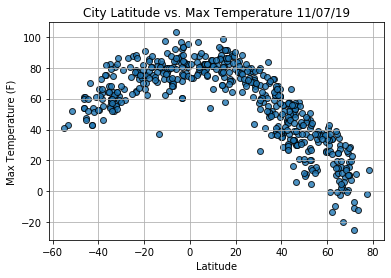

In [10]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

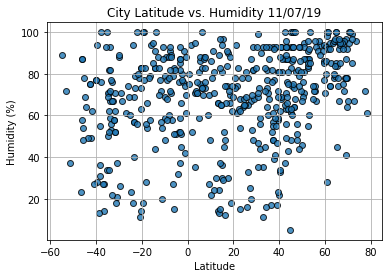

In [11]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

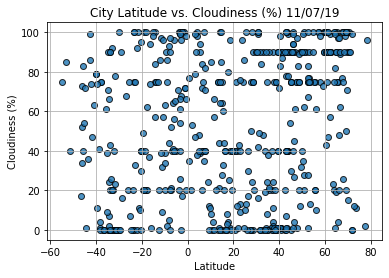

In [12]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

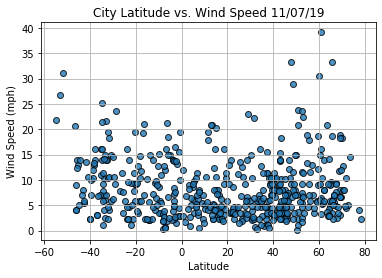

In [13]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()